Valid for ping 0.28.1 (21/01/2025)

## Ping Sample selection

In [1]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as pingmachine
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

### 1. Load data

In [2]:
# data folder
folder = r'C:\Users\Schimel_Alexandre\Data\MBES\Kongsberg all\EM2040\KV-Meritaito_2024_EM2040_Sorvest-F-1-1-extracts-WCD'

# list raw data files
files = pingmachine.echosounders.index_functions.find_files(folder,['.all','.wcd'])
files.sort()

# create the file handler
index_files = pingmachine.echosounders.index_functions.get_index_paths(files)
fileHandler = pingmachine.echosounders.kongsbergall.KongsbergAllFileHandler(files,index_files,init=True)

# get pings that contain WCD
pings = pingmachine.pingprocessing.filter_pings.by_features(fileHandler.get_pings(),['watercolumn.amplitudes'])

# check data with the WCI Viewer
viewer = pingmachine.pingprocessing.widgets.WCIViewer(pings, name='WCI Viewer')

Found 8 files
indexing files ⢀ 99% :00s<00m:00s] [Found: 7463 datagrams in 8 files (258MB)]                                          
Initializing ping interface ⡀ 75% :00s<00m:00s] [Done]                                              


### 2. Ping sample selectors

In [3]:
# we can specify the WCD samples we want, using a Ping Sample Selector 
pss = pingmachine.echosounders.pingtools.PingSampleSelector()

# for example, let's only select a number of beams
pss.select_beam_range_by_angles(-45,-15,5) # min angle, max angle, stepsize in degrees

### 3. Using ping sample selectors in WCI viewer

In [4]:
# call a new viewer with the ping sample selector
viewer2 = pingmachine.pingprocessing.widgets.WCIViewer(pings, name='WCI Viewer 2', ping_sample_selector=pss)

### 4. Using ping sample selectors in WCD extraction

In [5]:
# Remember how we get the WCD from a ping, and the data in it
wcd = pings[0].watercolumn
av = wcd.get_av()
print(f"av is of type {type(av)}")
print(f"av is a {np.shape(av)[0]} x {np.shape(av)[1]} beams-by-sample array, in numpy format.")
print("")

# To apply a ping sample selector, we first apply it to the WCD object to create a Beam Sample Selector
bss = pss.apply_selection(wcd)
print(f"bss is of type {type(bss)}.")
print("")

# And then pass this Beam Sample Selector in input to the get_av() method
av_selected = wcd.get_av(bss)
print(f"av_selected is of type {type(av_selected)}")
print(f"av_selected is a {np.shape(av_selected)[0]} x {np.shape(av_selected)[1]} beams-by-sample array, in numpy format.")

av is of type <class 'numpy.ndarray'>
av is a 256 x 1744 beams-by-sample array, in numpy format.

bss is of type <class 'themachinethatgoesping.echosounders_cppy.pingtools.BeamSampleSelection'>.

av_selected is of type <class 'numpy.ndarray'>
av_selected is a 20 x 1226 beams-by-sample array, in numpy format.


Text(0.5, 1.0, 'selected beams')

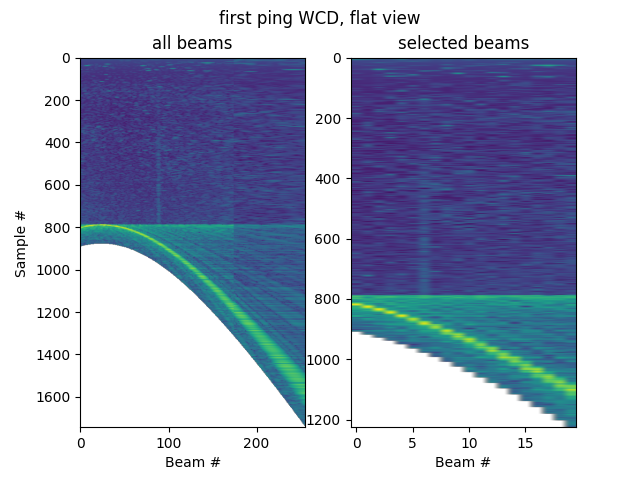

In [6]:
# example display
fig,ax = plt.subplots(1,2)
fig.suptitle('first ping WCD, flat view')
ax[0].imshow(av.transpose(),aspect='auto')
ax[0].set_xlabel('Beam #')
ax[0].set_ylabel('Sample #')
ax[0].set_title('all beams')
ax[1].imshow(av_selected.transpose(),aspect='auto')
ax[1].set_xlabel('Beam #')
ax[1].set_title('selected beams')

### 5. Using ping sample selectors in in Water-Column Images

In [7]:
# Remember how we get a WCI for a ping, using the make_wci function
# specify the desired number of pixels in acrosstrack distance
wci, extent = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512)

print(f"wci is of type {type(wci)}")
print(f"wci is a {np.shape(wci)[0]} x {np.shape(wci)[1]} across-track-by-vertical 2D array.")
print("")

# To apply a ping sample selector, we pass it in input to the make_wci function
wci_selected,extent_selected = pingmachine.pingprocessing.watercolumn.image.make_wci(pings[0],512,ping_sample_selector=pss)

print(f"wci_selected is of type {type(wci_selected)}")
print(f"wci_selected is a {np.shape(wci_selected)[0]} x {np.shape(wci_selected)[1]} across-track-by-vertical 2D array.")

wci is of type <class 'numpy.ndarray'>
wci is a 512 x 270 across-track-by-vertical 2D array.

wci_selected is of type <class 'numpy.ndarray'>
wci_selected is a 512 x 527 across-track-by-vertical 2D array.


Text(0.5, 1.0, 'first ping WCI, full data (color), selected extent (gray)')

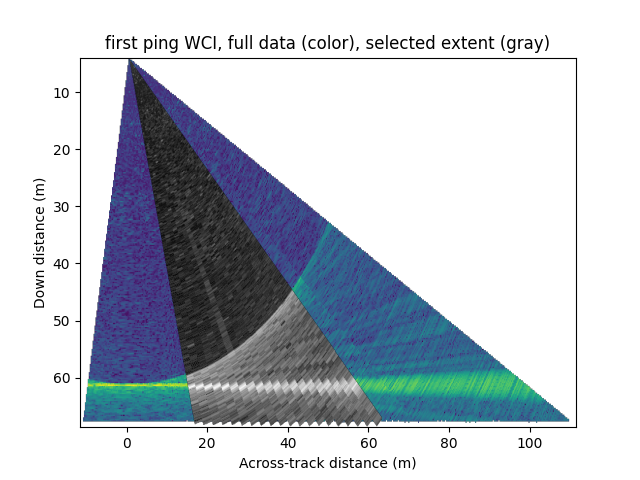

In [8]:
# example display

# first display full data
fig2,ax2 = pingmachine.pingprocessing.core.create_figure('wci2')
ax2.imshow(wci.transpose(), extent=extent, aspect='auto') # full data
xlim = ax2.get_xlim()
ylim = ax2.get_ylim()

# add image2 ontop of the same plot
ax2.imshow(wci_selected.transpose(), extent=extent_selected, aspect='auto', cmap='grey') # selected data
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_xlabel('Across-track distance (m)')
ax2.set_ylabel('Down distance (m)')
ax2.set_title('first ping WCI, full data (color), selected extent (gray)')

### 6. Shortlist of ping sample selectors

to do...